# Practical Section: Application on Neural dataset!

## 1. About the dataset

## 1.1 Dataset description


+ Allen Brain Institute datasets. Ephys. Neuropixels. 
+ Recordings from Six brain areas: 
    + Primary Visual cortex (V1)
    + Posteromedial Visual Cortex (PM)
    + Anteromedial Visual Cortex (AM)
    + Lateromedial Visual Cortex (LM)
    + Anterolateral Visual Cortex (AL) 
    + Rostrolateral Visual Cortex (RL)
+ 32 mice total.
+ Visual task. Drifting gratings stimuli.

## 1.2 Download



Run the following cell:

In [ ]:
! wget https://github.com/bsotomayorg/Intro_HPC_GRADE/raw/main/datasets/AllenData/ii_spike_times.npy
! wget https://github.com/bsotomayorg/Intro_HPC_GRADE/raw/main/datasets/AllenData/spike_times.npy
! wget https://github.com/bsotomayorg/Intro_HPC_GRADE/raw/main/datasets/AllenData/stim_label.npy

--2022-06-29 11:02:46--  https://github.com/bsotomayorg/Intro_HPC_GRADE/raw/main/datasets/AllenData/ii_spike_times.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bsotomayorg/Intro_HPC_GRADE/main/datasets/AllenData/ii_spike_times.npy [following]
--2022-06-29 11:02:47--  https://raw.githubusercontent.com/bsotomayorg/Intro_HPC_GRADE/main/datasets/AllenData/ii_spike_times.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3200128 (3.1M) [application/octet-stream]
Saving to: ‘ii_spike_times.npy’

ii_spike_times.npy  100%[===================>]   3.05M  --.-KB/s    in 0.06s   

2022-06-29 11:02:4

In [ ]:
! ls -lh 

total 4.3M
-rw-r--r-- 1 root root 3.1M Jun 29 11:02 ii_spike_times.npy
drwxr-xr-x 1 root root 4.0K Jun 15 13:42 sample_data
-rw-r--r-- 1 root root 1.2M Jun 29 11:02 spike_times.npy
-rw-r--r-- 1 root root 1.7K Jun 29 11:02 stim_label.npy


You see the file names? Then the dataset was downloaded and we are ready to work.

## 1.3 Data Format description


We will work with $N=1000$ neurons.

Three files (NumPy format):
1. `spike_times`: `ndarray` that contains all the spike times.

2. `ii_spike_times`: `ndarray` with size `(M, N, 2)`. `M` trials, `N` neurons, and 2. it contains the indices (`start` and `end`) of spikes to look at the `spike_times` array. For example: Spikes from the first neuron and third trial can be found and printed as:
```python
ini_index = ii_spike_times[0, 2, 0]
end_index = ii_spike_times[0, 2, 1]
print(spike_times[ini_index:end_index])
```

3. `stim_label`: `ndarray` that contains the orientation of the drifting gratings stimuli during visual task. Values: 0, 45, 90, and 135 (degrees).

**Example**

<img src="imgs/slides_d1/128.PNG" width="80%" height="80%" />

## 2. The Task: Decoding spiking activity in mice’s visual cortex

### 2.1. Exercises

1. Load the three files. Make sure your files are the path you indicate. When you load them, check their `shape`, and print the spike times for the first neuron and first trial (i.e., a neuron with index 0 and trial with index 0).

2. Exploratory analysis: create a function to visualize a raster with the spike times of every neuron (y-axis) across time (x-axis). Don't forget to add x- and y-labels. Use `plt.plot(, marker='|', ls='')`. 

3. Create a matrix with shape MxN (#trials times # neurons). Use this matrix to store the number of spikes per neuron and trial (ie., Firing rates matrix). Plot it using `plt.imshow()`

4. Create a function that returns the pairwise euclidean distance between every pair of trials of a `MxN` input matrix. For example, $FR_i$ and $FR_j$ are two firing rate vectors with length $N=1000$ (trials $i$ and $j$, respectively). Thus, the euclidean distance $d_{euc}$ has be computed as $d_{euc} = \sqrt{\sum_n^{N=1000}{(FR_{i,n}-FR_{j,n})}}$.

5. Compute t-SNE embedding. Define your t-SNE model as `TSNE(metric='precomputed', n_components=2, random_state=0).fit_transform(euc_diss)`, as `euc_diss` your euclidean distance matrix. Finally, print the shape.

6. Visualize the point of your t-SNE embedding. use `plt.scatter` to plot the points and use the `stim_label` values to color each point (i.e., `plt.scatter(x, y, c=stim_label)`). `stim_label` stores the orientation of stimuli. Don't forget to add x- and y-labels as "Component 1" and "Component 2", respectively. Finally, add a colorbar!

7. Can you explain the results?

----

### 2.2. Solutions

**Importing libs**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from pylab import cm
my_cmap = cm.get_cmap('viridis', 4) # Spectral_r

**Loading files**

In [ ]:
ii_spike_times = np.load("ii_spike_times.npy")
spike_times    = np.load("spike_times.npy")
stim_label     = np.load("stim_label.npy")

In [ ]:
print(ii_spike_times.shape)

(200, 1000, 2)


In [ ]:
n_trials = ii_spike_times.shape[0]
n_neurons = ii_spike_times.shape[1]

**Raster plot**

Text(0, 0.5, '# Neuron')

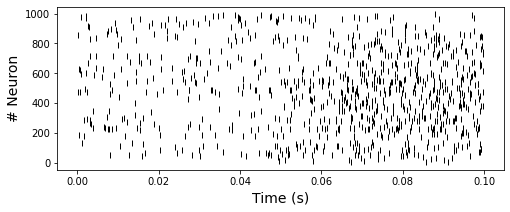

In [ ]:
plt.figure(figsize=(8,3), facecolor='w')
for i_N in range(n_neurons):
    st = spike_times[ii_spike_times[0,i_N,0]:ii_spike_times[0,i_N,1]]
    plt.plot(st, np.ones(shape=len(st))*i_N, marker='|', ls='', color='k')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("# Neuron", fontsize=14)

**Computing matrix ($M \times N$)**

In [ ]:
mat_trial_by_neurons = np.zeros(shape=(n_trials, n_neurons))
for i_M in range(n_trials):
    for i_N in range(n_neurons):
        st = spike_times[ii_spike_times[i_M,i_N,0]:ii_spike_times[i_M,i_N,1]]
        mat_trial_by_neurons[i_M, i_N] = len(st)

**Visualization of our $M \times N$ firing rates matrix**

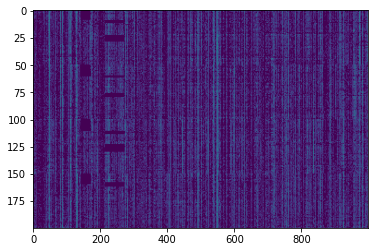

In [ ]:
f, ax = plt.subplots(figsize=(6,4), facecolor='w')
ax.imshow(np.log10(mat_trial_by_neurons+1), cmap='viridis', aspect='auto')

**Computing the euclidean pairwise distances between firing rate vectors**

In [ ]:
euc_diss = np.zeros(shape=(n_trials, n_trials))
for i_e0 in range(mat_trial_by_neurons.shape[0]):
    for i_e1 in range(1+i_e0, mat_trial_by_neurons.shape[0]):
        for i_N in range(mat_trial_by_neurons.shape[1]):
            euc_diss[i_e0, i_e1] += (mat_trial_by_neurons[i_e0, i_N]-mat_trial_by_neurons[i_e1, i_N])**2
        euc_diss[i_e1, i_e0] = euc_diss[i_e0, i_e1]
euc_diss = np.sqrt(euc_diss)

**Visualization of pairwise distances**

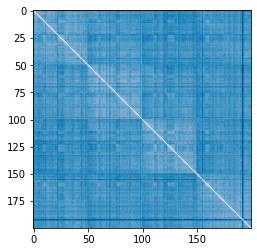

In [ ]:
plt.imshow(euc_diss, cmap='PuBu')

**Manifold Learning (t-SNE)**

In [ ]:
emb      = TSNE(metric='precomputed', n_components=2, random_state=0).fit_transform(euc_diss)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [ ]:
emb.shape

(200, 2)

**Visualization of 2D t-SNE embeddings**

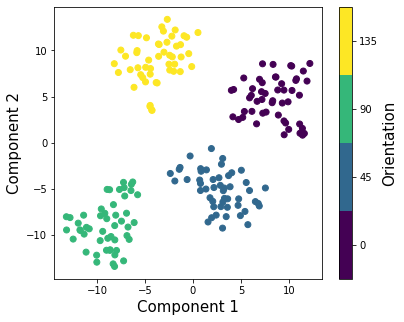

In [ ]:
fs = 15
plt.figure(figsize=(6,5), facecolor='w'); 
plt.scatter(emb[:,0], emb[:,1], c=stim_label, cmap=my_cmap, vmin=-22.5, vmax=157.5,); 
cbar = plt.colorbar()
cbar.set_label("Orientation", size=fs)
cbar.set_ticks([0,45,90, 135])
cbar.set_ticklabels([0,45,90, 135])
plt.xlabel("Component 1", fontsize=fs); plt.ylabel("Component 2", fontsize=fs); 

---

### 2.3. Bonus

8. Let's reduce the amount of neurons involves in each decoding analysis. Create another variable and store there the result the euclidean distance between all pair of firing rate vectors for **$N=100$ neurons only**.

9. Project the dissimilarity matrix using t-SNE manifold algorithm as before but for this new dissimilarity matrix that considers only $N=100$ neurons.

10. For both embeddings ($N_1=1000$ and $N_2=100$) Use *KMeans* with `n=4`. Visualize the embedding but change the `c` parameter by your kmeans clusters and compare those results.

11. Use *Adjusted Rand Index* `ARI` to evaluate the clustering performance. It computes a similarity measure between two vectors of labels (clusters) and it returns 1.0 when clusterings are identical (great clustering performance). If the result is close to 0.0 it means that the clustering was close to random (bad clustering performance).

   + 11.1. Import this metric as `from sklearn.metrics import adjusted_rand_score as ARI`.
   + 11.2. run ARI for both kmeans vectors. ARI will measure the clustering performance by comparing the true labels (i.e., `stim_labels`) and the ones we get from our clustering method (kmeans). 

  Example, if `kmean_labels_N100` and `kmean_labels_N1000` store the Kmean labels for $N_1=100$ and $N_2=1000$, compute ARI as `ARI_100 = ARI(kmean_labels_N100, stim_labels)` and `ARI_1000 = ARI(kmean_labels_N1000, stim_labels)`, respectively. 

12. Is there any difference? What can you conclude?


----

Day #1 of the summer course "_Introduction to High-Performance Computing in Python for Scientists!_". 


[Goethe Research Academy for Early Career Researchers (GRADE)](https://www.goethe-university-frankfurt.de/), Goethe University Frankfurt, Germany. June 2022.

---